In [57]:
import numpy as np 
import pandas as pd 
import dask.dataframe as dd
import dask
import gc
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Code to recreate the original kaggle problem, this notebook is integrated in the cleaning notebook, but contains extra analysis

In [2]:
gc.collect()
dtypes = {
        'MachineIdentifier':                                    'category',
        'ProductName':                                          'category',
        'EngineVersion':                                        'category',
        'AppVersion':                                           'category',
        'AvSigVersion':                                         'category',
        'IsBeta':                                               'int8',
        'RtpStateBitfield':                                     'float16',
        'IsSxsPassiveMode':                                     'int8',
        'DefaultBrowsersIdentifier':                            'float16',
        'AVProductStatesIdentifier':                            'float32',
        'AVProductsInstalled':                                  'float16',
        'AVProductsEnabled':                                    'float16',
        'HasTpm':                                               'int8',
        'CountryIdentifier':                                    'int16',
        'CityIdentifier':                                       'float32',
        'OrganizationIdentifier':                               'float16',
        'GeoNameIdentifier':                                    'float16',
        'LocaleEnglishNameIdentifier':                          'int8',
        'Platform':                                             'category',
        'Processor':                                            'category',
        'OsVer':                                                'category',
        'OsBuild':                                              'int16',
        'OsSuite':                                              'int16',
        'OsPlatformSubRelease':                                 'category',
        'OsBuildLab':                                           'category',
        'SkuEdition':                                           'category',
        'IsProtected':                                          'float16',
        'AutoSampleOptIn':                                      'int8',
        'PuaMode':                                              'category',
        'SMode':                                                'float16',
        'IeVerIdentifier':                                      'float16',
        'SmartScreen':                                          'category',
        'Firewall':                                             'float16',
        'UacLuaenable':                                         'float32',
        'Census_MDC2FormFactor':                                'category',
        'Census_DeviceFamily':                                  'category',
        'Census_OEMNameIdentifier':                             'float16',
        'Census_OEMModelIdentifier':                            'float32',
        'Census_ProcessorCoreCount':                            'float16',
        'Census_ProcessorManufacturerIdentifier':               'float16',
        'Census_ProcessorModelIdentifier':                      'float16',
        'Census_ProcessorClass':                                'category',
        'Census_PrimaryDiskTotalCapacity':                      'float32',
        'Census_PrimaryDiskTypeName':                           'category',
        'Census_SystemVolumeTotalCapacity':                     'float32',
        'Census_HasOpticalDiskDrive':                           'int8',
        'Census_TotalPhysicalRAM':                              'float32',
        'Census_ChassisTypeName':                               'category',
        'Census_InternalPrimaryDiagonalDisplaySizeInInches':    'float16',
        'Census_InternalPrimaryDisplayResolutionHorizontal':    'float16',
        'Census_InternalPrimaryDisplayResolutionVertical':      'float16',
        'Census_PowerPlatformRoleName':                         'category',
        'Census_InternalBatteryType':                           'category',
        'Census_InternalBatteryNumberOfCharges':                'float32',
        'Census_OSVersion':                                     'category',
        'Census_OSArchitecture':                                'category',
        'Census_OSBranch':                                      'category',
        'Census_OSBuildNumber':                                 'int16',
        'Census_OSBuildRevision':                               'int32',
        'Census_OSEdition':                                     'category',
        'Census_OSSkuName':                                     'category',
        'Census_OSInstallTypeName':                             'category',
        'Census_OSInstallLanguageIdentifier':                   'float16',
        'Census_OSUILocaleIdentifier':                          'int16',
        'Census_OSWUAutoUpdateOptionsName':                     'category',
        'Census_IsPortableOperatingSystem':                     'int8',
        'Census_GenuineStateName':                              'category',
        'Census_ActivationChannel':                             'category',
        'Census_IsFlightingInternal':                           'float16',
        'Census_IsFlightsDisabled':                             'float16',
        'Census_FlightRing':                                    'category',
        'Census_ThresholdOptIn':                                'float16',
        'Census_FirmwareManufacturerIdentifier':                'float16',
        'Census_FirmwareVersionIdentifier':                     'float32',
        'Census_IsSecureBootEnabled':                           'int8',
        'Census_IsWIMBootEnabled':                              'float16',
        'Census_IsVirtualDevice':                               'float16',
        'Census_IsTouchEnabled':                                'int8',
        'Census_IsPenCapable':                                  'int8',
        'Census_IsAlwaysOnAlwaysConnectedCapable':              'float16',
        'Wdft_IsGamer':                                         'float16',
        'Wdft_RegionIdentifier':                                'float16',
        'HasDetections':                                        'int8'
        }

## Load both training and timestams data

In [8]:
df_train = dd.read_csv("train.csv", blocksize= 256e6, dtype = dtypes)
gc.collect()
df_train = df_train.compute()

In [9]:
timestamp = np.load('AvSigVersionTimestamps.npy')
timestamp = timestamp[()]
# ADD TIMESTAMPS
df_train['Date'] = df_train['AvSigVersion'].map(timestamp)

In [53]:
df_train['YearMonth'] = df_train['Date'].map(lambda x: 100*x.year+x.month)

In [61]:
year_month = df_train.YearMonth.value_counts()
year_month.sort_values(ascending=False,inplace=True)

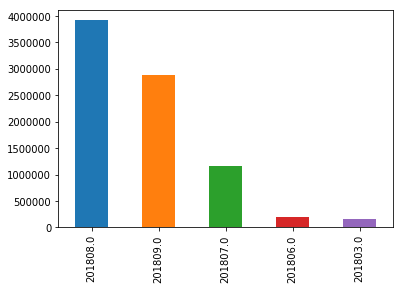

In [64]:
sub = year_month.iloc[:5]
sub.plot.bar()

## Recreating the original problem

Most of the data is from 07-2018, 08-2018 and 09-2018. To recreate the original problem, the test set will have data from 2018-09, and the training from the rest

In [84]:
8921483*0.25

2230370.75

In [1]:
334555/8921483

0.03749993134549491

In [97]:
df_train_sample = df_train.loc[df_train['YearMonth'] <= 201808.0]
df_test_sample = df_train.loc[df_train['YearMonth'] == 201809.0]

In [116]:
df_train_sample=df_train_sample.reset_index()


In [113]:
df_test_sample = df_test_sample.reset_index()

In [115]:
df_test_sample.head()

,index,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,...,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections,Date,YearMonth
0,8,00001a027a0ab970c408182df8484fce,win8defender,1.1.15200.1,4.18.1807.18075,1.275.988.0,0,7.0,0,NaN,...,0.0,0.0,0,0,0.0,0.0,15.0,0,2018-09-10 00:51:00,201809.0
1,13,000024872c81cf03fa862aa8f99e0984,win8defender,1.1.15200.1,4.18.1807.18075,1.275.895.0,0,7.0,0,NaN,...,NaN,0.0,0,0,0.0,0.0,3.0,0,2018-09-07 10:38:00,201809.0
2,18,00002b7454f06444e8d9f6083d8a9ebd,win8defender,1.1.15300.6,4.18.1809.2,1.277.48.0,0,7.0,0,NaN,...,NaN,0.0,0,0,0.0,1.0,1.0,0,2018-09-25 16:42:00,201809.0
3,24,000038f24a1ee98931456b3e49f7934b,win8defender,1.1.15200.1,4.18.1806.18062,1.275.879.0,0,7.0,0,NaN,...,0.0,0.0,0,0,0.0,0.0,7.0,0,2018-09-07 04:31:00,201809.0
4,27,00003ad63e561a25415551cd47d426d5,win8defender,1.1.15300.6,4.13.17134.1,1.277.25.0,0,7.0,0,NaN,...,NaN,0.0,0,0,0.0,0.0,3.0,0,2018-09-25 16:37:00,201809.0


In [120]:
np.random.seed(seed=123)
# Training set with 2230370 datapoints and test set with 334555
random_sampling_train = np.random.choice(range(df_train_sample.shape[0]), 2230370, replace=False)
random_sampling_test = np.random.choice(range(df_test_sample.shape[0]), 334555, replace=False)

In [121]:
df_sampled_train = df_train_sample.iloc[random_sampling_train]
df_sampled_test = df_test_sample.iloc[random_sampling_test]

In [136]:
## Save files

In [137]:
df_sampled_train.to_csv('train_sampled.csv',index=False)

In [138]:
df_sampled_test.to_csv('test_sampled.csv',index=False)

In [134]:
test = dd.read_csv("test.csv", blocksize= 256e6, dtype = dtypes)
gc.collect()
test = test.compute()
test.drop(['index'],axis=1,inplace=True) 